In [1]:
source("../R/deletionCategory.R")
source("../R/plotFunctions.R")

In [6]:
library(ggplot2)

In [23]:
library(grid)

In [21]:
library(e1071)
library(ggplot2)
library(plyr)
library(reshape2) 
library(sqldf)
library(parallel)
library(rtracklayer)

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


In [3]:
covs <- readCoverageTable("./input_example//Chromosome2BTest.tab", is_gz = FALSE)
head(covs)

[1] "./input_example//Chromosome2BTest.tab"


,LIB11222_Cadenza0100,LIB10289_Cadenza0104,LIB10920_Cadenza0105,LIB10929_Cadenza0106,LIB10963_Cadenza0107,LIB11399_Cadenza0108,LIB11208_Cadenza0111,LIB11226_Cadenza0112,LIB10306_Cadenza0116,LIB10921_Cadenza0117,⋯,LIB11494_Control,LIB11495_Control,LIB11490_Control,LIB11491_Control,LIB10702_Control,LIB10704_Control,LIB10705_Control,LIB10706_Control,LIB5782_Control,LIB8440_Control
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
IWGSC_CSS_2BL_scaff_636814:5559:6078,200,109,222,185,154,138,128,167,123,176,⋯,250,233,302,247,136,108,155,100,200,39
IWGSC_CSS_2BL_scaff_636814:6165:6283,86,46,72,46,72,48,61,60,45,47,⋯,105,71,89,77,43,41,54,72,63,21
IWGSC_CSS_2BL_scaff_636814:6524:6689,164,78,159,131,97,125,104,123,90,121,⋯,227,184,269,209,122,95,139,89,303,49
IWGSC_CSS_2BL_scaff_636814:6787:6916,87,68,108,97,91,74,83,90,75,63,⋯,122,125,176,130,92,80,92,80,100,29
IWGSC_CSS_2BL_scaff_636814:7005:7099,155,104,160,132,116,86,88,136,94,101,⋯,172,169,280,189,107,128,137,117,71,40
IWGSC_CSS_2BL_scaff_636814:7207:7393,140,74,149,118,93,100,85,145,105,96,⋯,175,166,246,162,116,87,101,121,172,46


In [36]:
countHigherThan <- function(x, min_cov=0){
    length( x[  x >= min_cov] )
}

tmp <- c(5,5,5,0,3)
countHigherThan(tmp)
countHigherThan(tmp, min_cov= 1)
countHigherThan(tmp, min_cov= 5)

filterRegionsWithLowCoverage <- function(mat, min_lines=0.0, min_cov=0){
	counts<- apply(mat, 1, countHigherThan, min_cov = min_cov )
    pass_filter <- counts > min_lines * ncol(mat)
    mat[pass_filter, ]
}
tmp2 <- filterRegionsWithLowCoverage(covs, min_cov=5, min_lines=0.05)
nrow(mat)
nrow(tmp2)
head(tmp2)

[1] 5

[1] 4

[1] 3

[1] 10163

[1] 9308

,LIB11222_Cadenza0100,LIB10289_Cadenza0104,LIB10920_Cadenza0105,LIB10929_Cadenza0106,LIB10963_Cadenza0107,LIB11399_Cadenza0108,LIB11208_Cadenza0111,LIB11226_Cadenza0112,LIB10306_Cadenza0116,LIB10921_Cadenza0117,⋯,LIB11494_Control,LIB11495_Control,LIB11490_Control,LIB11491_Control,LIB10702_Control,LIB10704_Control,LIB10705_Control,LIB10706_Control,LIB5782_Control,LIB8440_Control
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
IWGSC_CSS_2BL_scaff_636814:5559:6078,200,109,222,185,154,138,128,167,123,176,⋯,250,233,302,247,136,108,155,100,200,39
IWGSC_CSS_2BL_scaff_636814:6165:6283,86,46,72,46,72,48,61,60,45,47,⋯,105,71,89,77,43,41,54,72,63,21
IWGSC_CSS_2BL_scaff_636814:6524:6689,164,78,159,131,97,125,104,123,90,121,⋯,227,184,269,209,122,95,139,89,303,49
IWGSC_CSS_2BL_scaff_636814:6787:6916,87,68,108,97,91,74,83,90,75,63,⋯,122,125,176,130,92,80,92,80,100,29
IWGSC_CSS_2BL_scaff_636814:7005:7099,155,104,160,132,116,86,88,136,94,101,⋯,172,169,280,189,107,128,137,117,71,40
IWGSC_CSS_2BL_scaff_636814:7207:7393,140,74,149,118,93,100,85,145,105,96,⋯,175,166,246,162,116,87,101,121,172,46


Warning message:
“Use of `quantiles$value` is discouraged. Use `value` instead.”
Warning message:
“Removed 415 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 12 rows containing missing values (geom_bar).”
Warning message:
“Use of `quantiles$value` is discouraged. Use `value` instead.”
Warning message:
“Removed 414 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 6 rows containing missing values (geom_bar).”


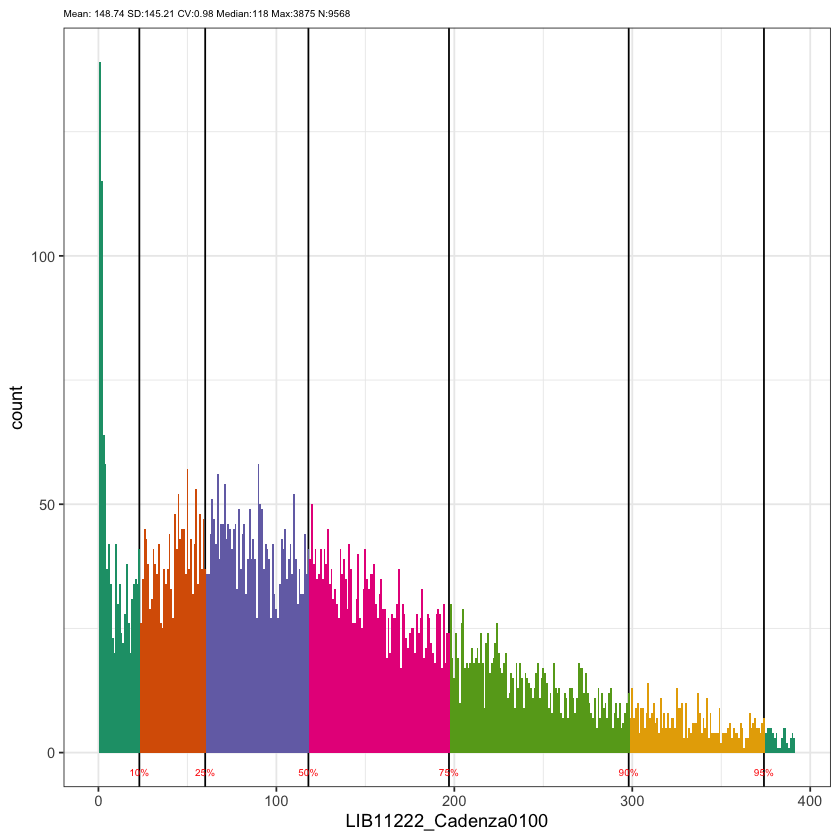

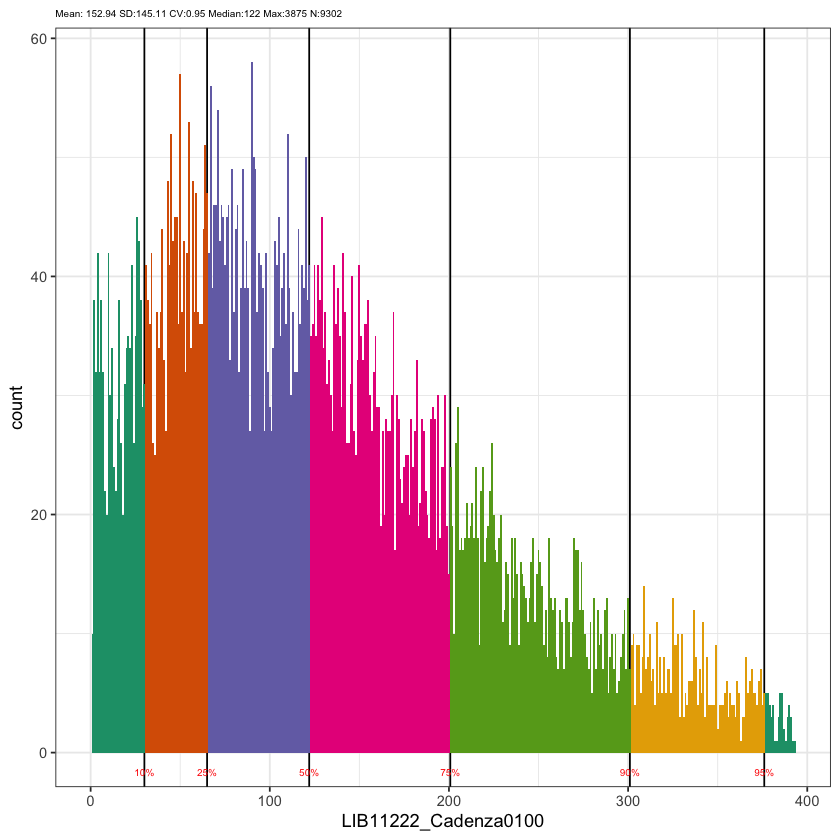

In [37]:
plotHistogram(mat, column = "LIB11222_Cadenza0100", binwidth = 1)
plotHistogram(tmp2, column = "LIB11222_Cadenza0100", binwidth = 1)

In [40]:
df <- getExonsDF(covs)
head(df)

,Scaffold,Start,Ends,Exon,ExonL,sdExon
,<chr>,<int>,<int>,<chr>,<int>,<dbl>
c..IWGSC_CSS_2BL_scaff_636814....5559....6078..,IWGSC_CSS_2BL_scaff_636814,5559,6078,IWGSC_CSS_2BL_scaff_636814:5559:6078,519,49.13580
c..IWGSC_CSS_2BL_scaff_636814....6165....6283..,IWGSC_CSS_2BL_scaff_636814,6165,6283,IWGSC_CSS_2BL_scaff_636814:6165:6283,118,18.07210
c..IWGSC_CSS_2BL_scaff_636814....6524....6689..,IWGSC_CSS_2BL_scaff_636814,6524,6689,IWGSC_CSS_2BL_scaff_636814:6524:6689,165,39.43312
c..IWGSC_CSS_2BL_scaff_636814....6787....6916..,IWGSC_CSS_2BL_scaff_636814,6787,6916,IWGSC_CSS_2BL_scaff_636814:6787:6916,129,29.05749
c..IWGSC_CSS_2BL_scaff_636814....7005....7099..,IWGSC_CSS_2BL_scaff_636814,7005,7099,IWGSC_CSS_2BL_scaff_636814:7005:7099,94,41.11791
c..IWGSC_CSS_2BL_scaff_636814....7207....7393..,IWGSC_CSS_2BL_scaff_636814,7207,7393,IWGSC_CSS_2BL_scaff_636814:7207:7393,186,35.92212


,LIB11222_Cadenza0100,LIB10289_Cadenza0104,LIB10920_Cadenza0105,LIB10929_Cadenza0106,LIB10963_Cadenza0107,LIB11399_Cadenza0108,LIB11208_Cadenza0111,LIB11226_Cadenza0112,LIB10306_Cadenza0116,LIB10921_Cadenza0117,⋯,LIB11494_Control,LIB11495_Control,LIB11490_Control,LIB11491_Control,LIB10702_Control,LIB10704_Control,LIB10705_Control,LIB10706_Control,LIB5782_Control,LIB8440_Control
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IWGSC_CSS_2BL_scaff_636814:5559:6078,1.0953254,0.9279712,1.0929504,1.1775052,1.1133961,0.9128327,1.1245586,1.0460398,0.9966362,1.1028457,⋯,0.9844866,0.9990157,1.0057985,1.0797787,1.0227456,0.8623622,1.0830486,0.8092865,1.0557022,0.6143699
IWGSC_CSS_2BL_scaff_636814:6165:6283,1.3183226,1.0961650,0.9921791,0.8195191,1.4570404,0.8887169,1.5000719,1.0519452,1.0205967,0.8243470,⋯,1.1573620,0.8520888,0.8296676,0.9421904,0.9051224,0.9163469,1.0561367,1.6309659,0.9308122,0.9259654
IWGSC_CSS_2BL_scaff_636814:6524:6689,1.1110201,0.8214242,0.9682990,1.0314005,0.8674923,1.0227913,1.1302393,0.9530195,0.9020674,0.9378910,⋯,1.1057593,0.9758861,1.1082079,1.1301837,1.1348892,0.9383275,1.2014231,0.8909579,1.9784222,0.9548306
IWGSC_CSS_2BL_scaff_636814:6787:6916,0.8150022,0.9902464,0.9094893,1.0560616,1.1253737,0.8372790,1.2473163,0.9642744,1.0394873,0.6752569,⋯,0.8217809,0.9167539,1.0026355,0.9720924,1.1834310,1.0926531,1.0995892,1.1074360,0.9028962,0.7814294
IWGSC_CSS_2BL_scaff_636814:7005:7099,1.0113919,1.0549113,0.9385169,1.0010129,0.9992211,0.6777744,0.9211481,1.0149515,0.9074737,0.7540464,⋯,0.8069988,0.8633318,1.1110579,0.9844060,0.9587097,1.2177287,1.1405425,1.1281394,0.4465236,0.7507580
IWGSC_CSS_2BL_scaff_636814:7207:7393,1.0174393,0.8360015,0.9734218,0.9966449,0.8922350,0.8777673,0.9909652,1.2052221,1.1289850,0.7982532,⋯,0.9144821,0.9444779,1.0871926,0.9397670,1.1575881,0.9218336,0.9364939,1.2994363,1.2047785,0.9615913


Warning message:
“Use of `quantiles$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `quantiles$value` is discouraged. Use `value` instead.”


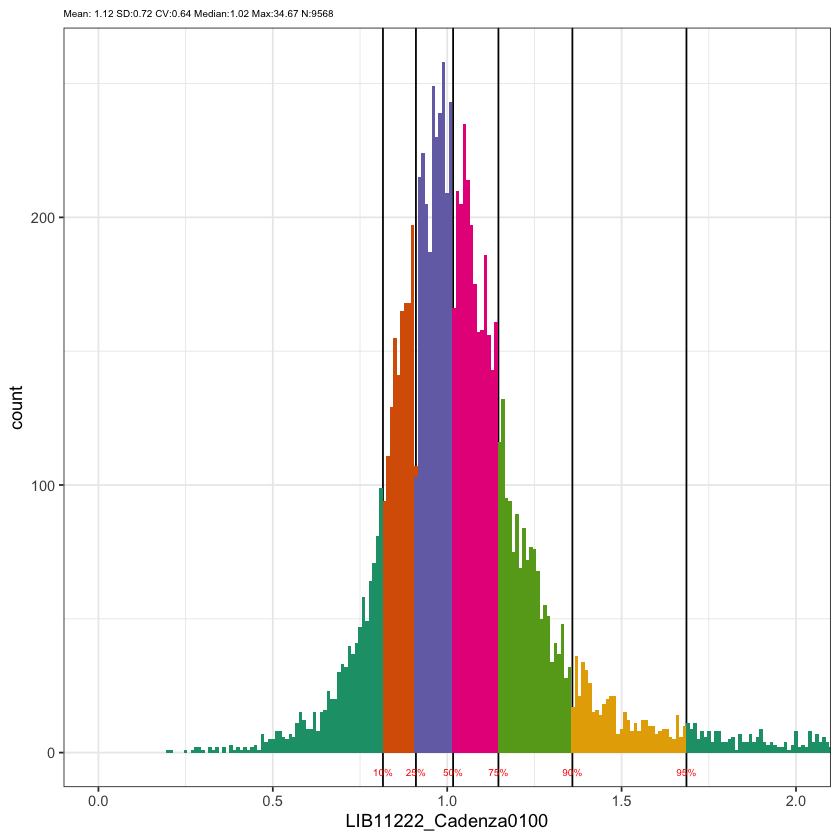

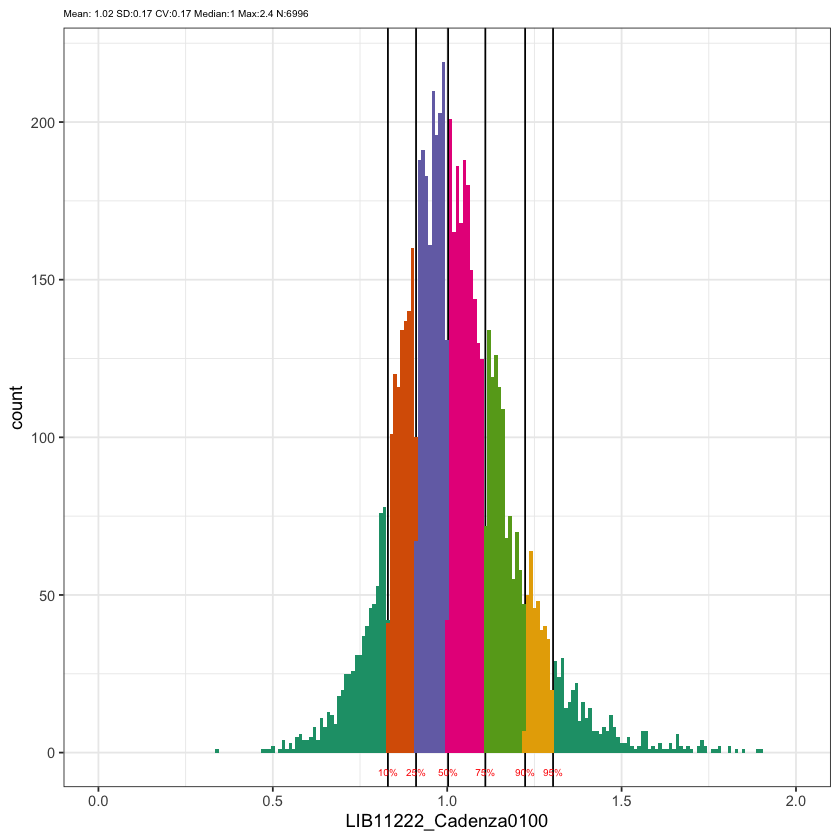

In [60]:
#' Function that normalizes the coverages, in an RPKM-like values, and normalized to have a mean of 1, at the exon level.
normalizeCovs<-function(counts, exonsDF, remove.zero = F) {
    counts <- as.matrix(counts)
    if(remove.zero){
         counts<- apply(counts, 2 , function(x){ifelse(x == 0, NA, x)}) 
    }
	exonLengths<-exonsDF$ExonL
	totalReadsPerSample<-apply(counts,2,sum, na.rm=T)
	multiplier<-outer(exonLengths, totalReadsPerSample )
	multiplier<-1/multiplier
	multiplier<-1000000000*multiplier
	#"RPKM-like covs"
	multiplier<-counts*multiplier
	rowsToRemove<-rowSums(multiplier)>0
	
	#Filtering the rows with AVG=0 
	multiplier<-multiplier[rowsToRemove,]
	
   
	#Normalize by multiplying by the mean of each row. 	
	mean.mult <- apply(multiplier, 1, mean, na.rm = T)
	covs<-sweep(multiplier,MARGIN=1,mean.mult,'/')
    #covs <- ifelse(is.na(covs), 0, covs)
    if(remove.zero){
         covs<- apply(covs, 2 , function(x){ifelse(is.na(x), 0, x)}) 
    }
    
	as.data.frame(covs)
}

mat <- normalizeCovs(covs, df, remove.zero=F)
head(mat)
plotHistogram(mat, column = "LIB11222_Cadenza0100", binwidth = 0.01, trim_range=F) + coord_cartesian(xlim=c(0,2))
mat2 <- normalizeCovs(covs, df, remove.zero=T)
plotHistogram(mat2, column = "LIB11222_Cadenza0100", binwidth = 0.01, trim_range=F)+ coord_cartesian(xlim=c(0,2))

In [51]:
head(covs)

,LIB11222_Cadenza0100,LIB10289_Cadenza0104,LIB10920_Cadenza0105,LIB10929_Cadenza0106,LIB10963_Cadenza0107,LIB11399_Cadenza0108,LIB11208_Cadenza0111,LIB11226_Cadenza0112,LIB10306_Cadenza0116,LIB10921_Cadenza0117,⋯,LIB11494_Control,LIB11495_Control,LIB11490_Control,LIB11491_Control,LIB10702_Control,LIB10704_Control,LIB10705_Control,LIB10706_Control,LIB5782_Control,LIB8440_Control
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
IWGSC_CSS_2BL_scaff_636814:5559:6078,200,109,222,185,154,138,128,167,123,176,⋯,250,233,302,247,136,108,155,100,200,39
IWGSC_CSS_2BL_scaff_636814:6165:6283,86,46,72,46,72,48,61,60,45,47,⋯,105,71,89,77,43,41,54,72,63,21
IWGSC_CSS_2BL_scaff_636814:6524:6689,164,78,159,131,97,125,104,123,90,121,⋯,227,184,269,209,122,95,139,89,303,49
IWGSC_CSS_2BL_scaff_636814:6787:6916,87,68,108,97,91,74,83,90,75,63,⋯,122,125,176,130,92,80,92,80,100,29
IWGSC_CSS_2BL_scaff_636814:7005:7099,155,104,160,132,116,86,88,136,94,101,⋯,172,169,280,189,107,128,137,117,71,40
IWGSC_CSS_2BL_scaff_636814:7207:7393,140,74,149,118,93,100,85,145,105,96,⋯,175,166,246,162,116,87,101,121,172,46


In [59]:
min(covs)

[1] 0